In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [9]:
df = pd.read_csv(r"C:\Users\revan\Downloads\YOUTUBE CHANNELS DATASET.csv")

In [11]:
df.head(10)

,Ranking,Username,Subscribers,Uploads,Views,Country
0,1.0,MrBeast,336M,838,"66,853,633,536",US
1,2.0,T-Series,281M,"22,313","277,242,795,553",IN
2,3.0,Cocomelon-Nursery Rhymes,186M,1370,"194,361,752,276",US
3,4.0,Youtube Movies,185M,0,0,NaN
4,5.0,Set India,180M,"148,727","172,709,029,653",IN
5,6.0,Vlad & Niki,129M,796,"99,291,499,729",US
6,7.0,Kids Diana Show,128M,"1,282","108,987,929,584",US
7,8.0,Like Nastya,124M,918,"108,128,507,997",US
8,9.0,Music,121M,0,0,NaN
9,10.0,Zee Music Company,112M,"12,787","72,091,345,721",IN


In [15]:
df.tail()

,Ranking,Username,Subscribers,Uploads,Views,Country
96,97.0,Voce Sabia,46M,"1,714","8,180,068,059",BR
97,98.0,Katy Perry,45.6M,170,"27,616,850,074",US
98,99.0,Speed Records,45.5M,"11,880","30,587,436,800",IN
99,100.0,Zhong,45.5M,"1,861","17,998,163,730",US
100,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.shape

(101, 6)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ranking      100 non-null    float64
 1   Username     100 non-null    object 
 2   Subscribers  100 non-null    object 
 3   Uploads      100 non-null    object 
 4   Views        100 non-null    object 
 5   Country      94 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.9+ KB


In [160]:
df['Subscribers'] = df['Subscribers'].str.replace('M', '').astype(float)
df['Views'] = df['Views'].str.replace(',', '', regex=True).astype(float)
df['Uploads'] = df['Uploads'].str.replace(',', '', regex=True).astype(float)

In [164]:
df['Subscribers'] = df['Subscribers'].fillna(0).astype(int)
df['Uploads'] = df['Uploads'].fillna(0).astype(int)
df['Views'] = df['Views'].fillna(0).astype(int)

In [168]:
#Here we have extracted only 3 and 4 columns as we will use a 2D plot to see the clusters.
x = df.iloc[:, [3, 4]].values  

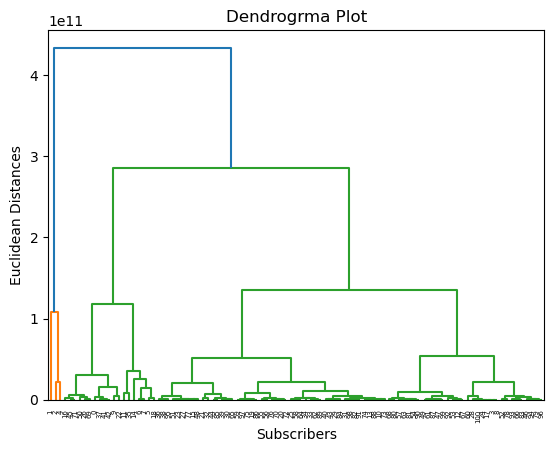

In [172]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Subscribers")  
plt.show()  

In [176]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, linkage='ward')  
y_pred= hc.fit_predict(x)  

In [178]:
y_pred

array([4, 0, 0, 2, 0, 3, 3, 3, 2, 4, 1, 3, 2, 1, 3, 1, 4, 2, 3, 1, 1, 1,
       4, 1, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 4, 4, 1,
       1, 4, 2, 2, 1, 2, 4, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 4, 1, 4, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2])

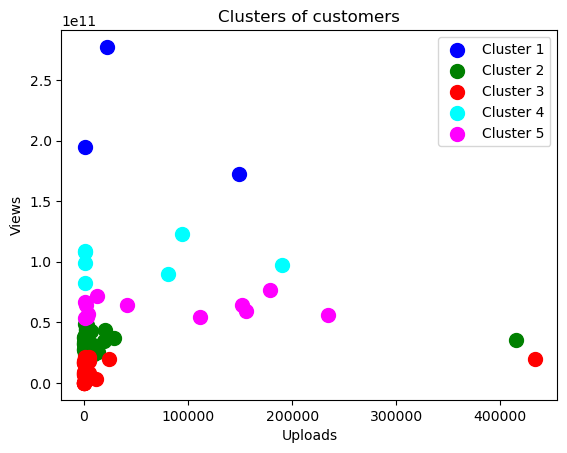

In [182]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Uploads')  
plt.ylabel('Views')  
plt.legend()  
plt.show()  